# **CLASSIFICATION OF CLAIMS DATA**

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## **LOAD DATA**

In [2]:
claims = pd.read_csv('claims_data.csv')
claims.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


## **EXPLORATORY DATA ANALYSIS**

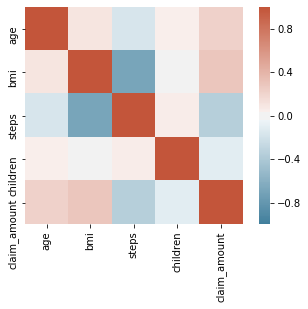

In [3]:
corr = claims.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True)

The correlation heatmap shows the relationship between the numerical columns in the dataset. With a correlation of 1 showing the highest positive correlation between two features and -1 showing the highest negative correlation between two features.

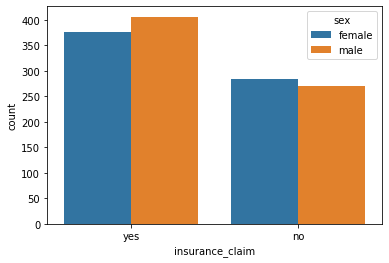

In [4]:
ax = sns.countplot(x="insurance_claim", hue="sex", data=claims)

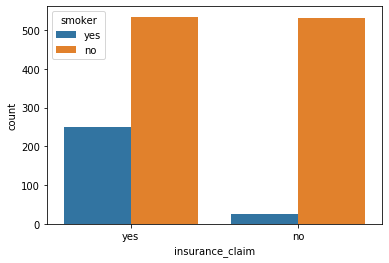

In [5]:
ax = sns.countplot(x="insurance_claim", hue="smoker", data=claims)

The two countplots above show how smoker status and gender affects whether or not the customer claimed. It is clear that more males claim than females and more non-smokers claim than smokers.

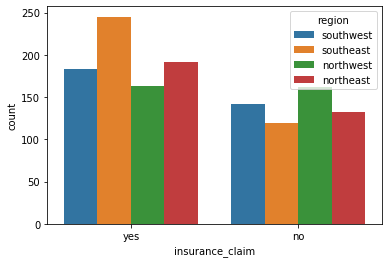

In [6]:
ax = sns.countplot(x="insurance_claim", hue="region", data=claims)

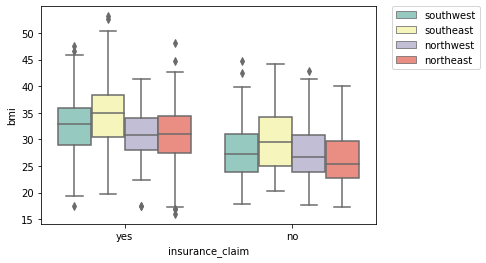

In [7]:
ax = sns.boxplot(x="insurance_claim", y="bmi", hue="region",
                 data=claims, palette="Set3")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The boxplot and barplot above shows how bmi and region affects whether or not a customer claims. Customers in the southeast region shows to have the highest average bmi between the customers who claim while customers in the northeast show to have the lowest bmi's on average. It is clear from the barplot that more customers in the southeast region are claiming with northeast having the least customers claiming. Therefore, it is safe to assume that the customer's bmi has a negative correlation with whether or not a customer claims. 

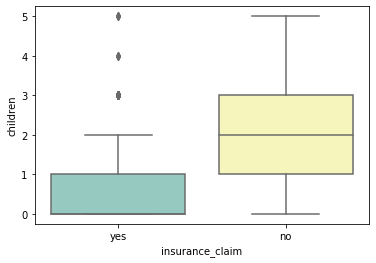

In [8]:
ax = sns.boxplot(x="insurance_claim", y="children",
                 data=claims, palette="Set3")

Customers with more children tend not to claim.

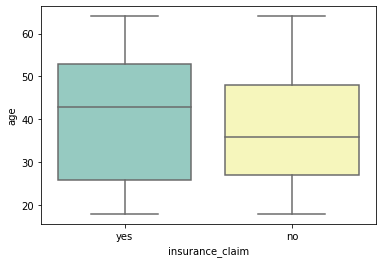

In [9]:
ax = sns.boxplot(x="insurance_claim", y="age",
                 data=claims, palette="Set3")

Older customers tend to claim more compared to younger customers.

## **MODELING**

In [10]:
# SPLITTING DATASET INTO FEATURES AND LABELS
 
y = claims['insurance_claim']
X = claims.drop('insurance_claim', axis=1)

In [11]:
# TRANSFORM THE CATEGORICAL DATA INTO NUMERICAL DATA

X = pd.get_dummies(X, drop_first=True)

In [12]:
# SPLITTING INTO TRAIN AND TEST SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**LOGISTIC REGRESSION MODEL**

In [13]:
# FIT THE MODEL TO THE TRAINING SET

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# USE THE MODEL TO PREDICT Y VALUES 

y_pred = lr.predict(X_test)

**XGBOOST MODEL**

In [15]:
xg =  XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
y_pred2 = xg.predict(X_test)

**LINEAR REGRESSION MODEL**

In [17]:
yes_claim = claims[claims['insurance_claim']== 'yes']
yes_claim.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552
6,46,female,33.44,3002,1,no,southeast,yes,8240.5896
10,25,male,26.22,8006,0,no,northeast,yes,2721.3208


In [46]:
y = yes_claim['claim_amount']
X = yes_claim.drop(['insurance_claim','claim_amount'], axis=1)

In [47]:
# TRANSFORM THE CATEGORICAL DATA INTO NUMERICAL DATA

X = pd.get_dummies(X, drop_first=True)

In [48]:
# SPLITTING INTO TRAIN AND TEST SETS

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=50)

In [49]:
linr = LinearRegression()
linr.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred3 = linr.predict(X_test_2)

## **EVALUATE MODELS**

**LOGISTIC REGRESSION**

In [23]:
accuracy_score(y_test, y_pred)

1.0

In [24]:
confusion_matrix(y_test, y_pred)

array([[171,   0],
       [  0, 231]], dtype=int64)

**XGBOOST**

In [25]:
accuracy_score(y_test, y_pred2)

1.0

In [26]:
confusion_matrix(y_test, y_pred2)

array([[171,   0],
       [  0, 231]], dtype=int64)

**LINEAR REGRESSION**

In [56]:
y_test_2 = np.array(y_test_2).reshape(-1,1)
y_test_2.shape

(235, 1)

In [53]:
y_pred3.reshape(-1,1).shape

(235, 1)

In [57]:
residuals=y_test_2-y_pred3

In [60]:
print('MSE:', mean_squared_error(y_test_2,y_pred3))
print('RMSE:',mean_squared_error(y_test_2,y_pred3)**0.5)
print('MAE:',mean_absolute_error(y_test_2,y_pred3))
print('R2 Score:',r2_score(y_test_2,y_pred3))

MSE: 39456019.00465112
RMSE: 6281.402630356624
MAE: 4652.443161345529
R2 Score: 0.819544866311619


## **CONCLUSION**

Both the classification models produced 100% accuracy. 
For the Linear Regression model the Mean Squared Error (MSE) being an estimator measuring the average squared difference between the estimated values and true value is quite large. This may be a concern and further evauluation of the model should be considered. One suggestion would be data clean up or data extraction to use more valuable data. The Coefficient of determination (R2) of the linear regression model is 0.82 and this score is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). The best possible value for this is 1.00, since 0.82 is relatively close to 1.00, the linear regression model did not fare too poorly, however further data analysis, cleanup and extraction may lead to a better score.